--- 0.07706832885742188 seconds ---
--- 0.0030002593994140625 seconds ---
--- 0.0 seconds ---
[(6.394884621840902e-14+0j), (-8.640561730216943e-14-3.981695206510969e-14j), (253.27571113558585+37.2480086550049j), (7.931003809802595e-14-3.826069111509996e-14j), (331.1304469584709+194.4444061861474j), (2.298641566620303e-13+1.1336056515074772e-13j), (-97.22220309307355-165.56522347923527j), (2.3836894515574803e-13-1.4226516292505688e-14j), (-896+8.029132914089132e-13j), (-2.8829583772982213e-13+3.112174285974733e-14j), (-1.4836581241820341e-13+6.140836874433174e-14j), (-9.428091772271778e-14+7.592328752091942e-14j), (-6.553140109109023e-14+7.724732331318884e-14j), (-9.338322800995065e-14-9.512180382469703e-15j), (3.108501199997356e-14+2.2301676012469725e-14j), (-4.910067525454294e-14+1.474221534917857e-13j), (-3.771102136861441e-13+1.525372890756103e-14j), (-2.948205030079434e-14-5.25225455056362e-13j), (-1.688402529503168e-13-1.7221180497307488e-13j), (8.723702768137769e-14-2.78541511057

<IPython.core.display.Javascript object>


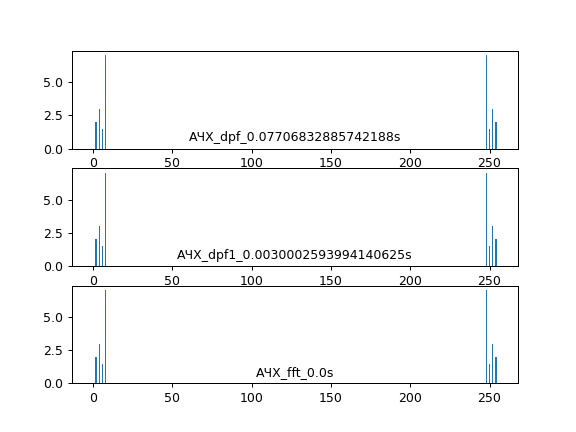

<IPython.core.display.Javascript object>


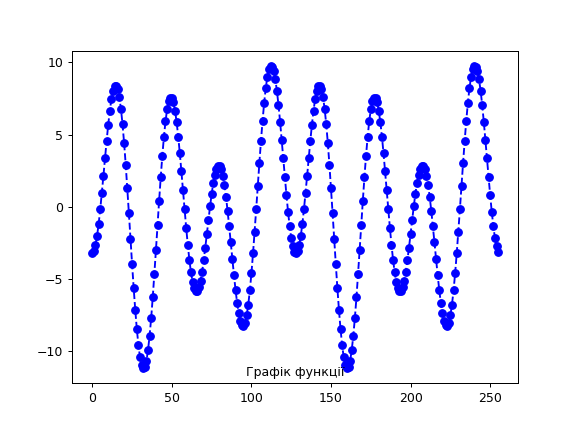

In [8]:
# ПОРІВНЯННЯ АЛГОРИТМІВ
# import math
from math import e, pi, sin, cos
import time
# псевдонім
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import sys

def W(N, l):
    m = (-pi*l/N)*2j
    return e ** (m)

def dpf(x):
    N=len(x)
    S=[]
    for i in range(N):
        Sn=0
        for k in range(N):
            Sn=Sn + x[k]*W(N, k*i)
        S.append(Sn)
    return S

def dpf1(ff):
    N = len(ff)
    if N <= 1:
        return ff
    fp = dpf1(ff[0::2])
    fnp = dpf1(ff[1::2])
    NP = [W(N, k) * fnp[k] for k in range(N // 2)]
    Cn = [fp[k] + NP[k] for k in range(N // 2)] + [fp[k] - NP[k] for k in range(N // 2)]
    return Cn

f = []
T = 2
Z = 256
t2 = []
# досліджувана функція
for i in range(Z):
    t = i * T / Z
    t2.append(t)
    f.append(2*sin(2*pi*t+8)+3*cos(4*pi*t-100)+1.5*sin(6*pi*t+100)-7*cos(8*pi*t))

#поточна глибина рекурсії
# print(sys.getrecursionlimit())
# sys.setrecursion(5000)
# sys.setrecursionlimit(10000)
    
start = time.time()
y_1=dpf(f)
end = time.time()
t_1=end - start
print("--- %s seconds ---" % t_1)

start = time.time()
y_2=dpf1(f)
end = time.time()
t_2=end - start
print("--- %s seconds ---" % t_2)

start = time.time()
y_3=fft(f)
end = time.time()
t_3=end - start
print("--- %s seconds ---" % t_3)

L1=len(y_1)
L2=len(y_2)
L3=len(y_3)
y1=[]
y2=[]
y3=[]
print(y_2)
for i in range(L1):
    y1.append(abs(y_1[i])/(L1/2))
for i in range(L2):
    y2.append(abs(y_2[i])/(L2/2))
for i in range(L3):
    y3.append(abs(y_3[i])/(L3/2))
x1 = np.linspace(0, L1 - 1, L1)
x2 = np.linspace(0, L2 - 1, L2)
x3 = np.linspace(0, L3 - 1, L3)

%matplotlib notebook
# figure - вікно, рисунок на якому будуть графіки
# axes - сам графік, система координат
fig = plt.figure()
# розкреслюємо рисунок на 3 частини
# вставляємо графік в першу комірку
ax1 = fig.add_subplot(3, 1, 1)
# вставляємо графік в другу комірку
ax2 = fig.add_subplot(3, 1, 2)
# вставляємо графік в третю комірку
ax3 = fig.add_subplot(3, 1, 3)


ax1.set_title(r'АЧХ_dpf_'+str(t_1)+'s', fontsize=10, x=0.5, y=0)
ax1.bar(x1, y1)
ax2.set_title(r'АЧХ_dpf1_'+str(t_2)+'s', fontsize=10, x=0.5, y=0)
ax2.bar(x2, y2)
ax3.set_title(r'АЧХ_fft_'+str(t_3)+'s', fontsize=10, x=0.5, y=0)
ax3.bar(x3, y3)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title(r'Графік функції', fontsize=10, x=0.5, y=0)
ax.plot(x1, f, color='blue', marker='o', linestyle='--')
